In [1]:
# import the necessary libraries

import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
import matplotlib.pyplot as plt
from statistics import mean,stdev
from sklearn.cluster import KMeans
from IPython.display import display
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score,completeness_score, homogeneity_score


warnings.filterwarnings('ignore')

In [2]:
# read the datasets and assign the columns

columns = ['intercolumnar distance','upper margin','lower margin','exploitation','row number','modular ratio','interlinear spacing','weight','peak number','modular ratio/ interlinear spacing','class']
train = pd.read_csv("avila/avila-tr.txt",header=None,names=columns)
test = pd.read_csv("avila/avila-ts.txt",header=None,names=columns)

#adding both the train and test datasets
# avila = train.append(test, ignore_index=True)
avila = pd.concat([train, test], ignore_index=True)


In [3]:
avila

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
20862,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
20863,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
20864,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
20865,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [4]:
# change the target variable as category from object

avila['class'] = avila['class'].astype('category')

In [5]:
#check for null values in the dataset

print(f'Null values in the dataset {os.linesep}')
print(avila.isna().sum())

Null values in the dataset 

intercolumnar distance                0
upper margin                          0
lower margin                          0
exploitation                          0
row number                            0
modular ratio                         0
interlinear spacing                   0
weight                                0
peak number                           0
modular ratio/ interlinear spacing    0
class                                 0
dtype: int64


## Data Analysis

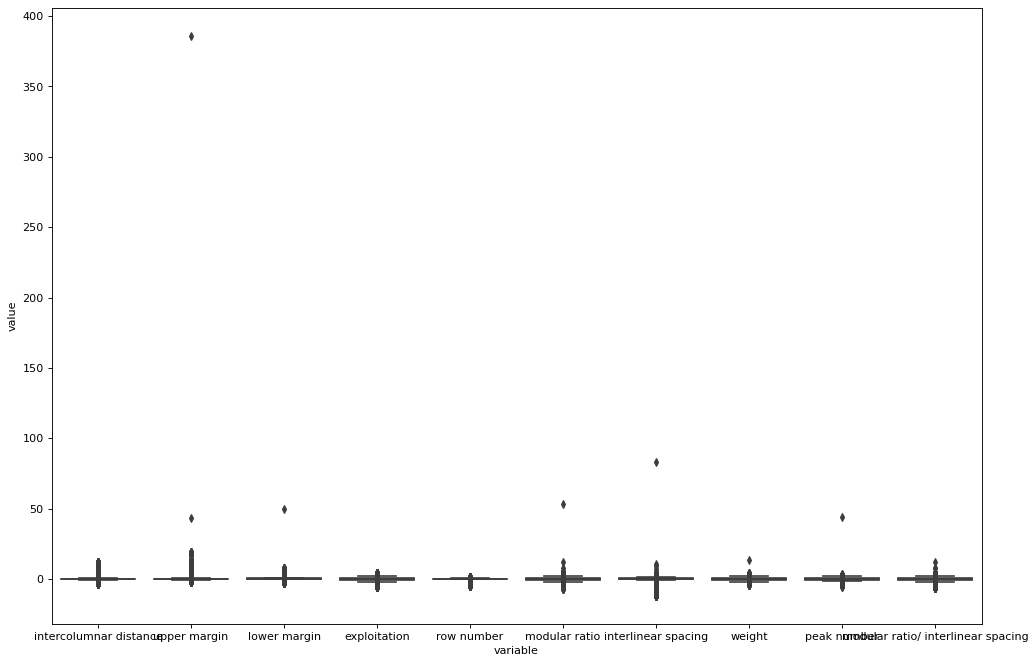

In [6]:
# boxplot for checking the outliers
figure(figsize=(15, 10), dpi=80)
sns.boxplot(x="variable", y="value", data=pd.melt(avila.drop('class',axis=1)))

plt.show()

In [7]:
#remove outliers using Z score normalization technique

avila = avila[(np.abs(stats.zscore(avila.drop('class',axis=1))) < 3).all(axis=1)]
avila.reset_index(drop=True,inplace=True)

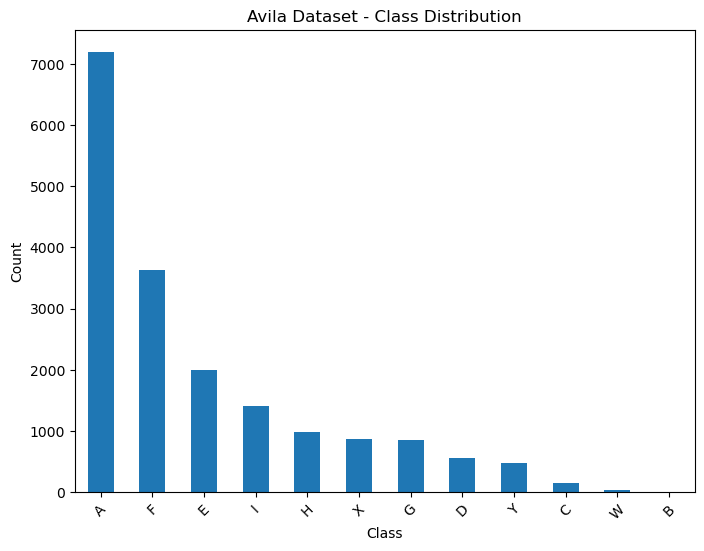

In [8]:
class_counts = avila['class'].value_counts()

# Create a bar chart for class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Avila Dataset - Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [9]:
# value counts of each class
avila['class'].value_counts()

class
A    7195
F    3628
E    1993
I    1407
H     985
X     869
G     857
D     558
Y     472
C     155
W      28
B       0
Name: count, dtype: int64

In [10]:
# summary statistics
avila.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,0.074051,-0.048788,0.187505,0.097765,0.187524,0.020853,0.070560,0.033321,0.126959,0.049281
std,0.338297,0.544918,0.398939,0.848884,0.451228,0.874927,0.709314,0.894532,0.819095,0.810993
min,-2.523635,-2.426761,-3.075385,-2.543473,-2.687761,-3.173198,-3.441614,-2.978887,-3.116426,-2.987972
25%,-0.104241,-0.267686,0.089814,-0.424583,0.172340,-0.557133,-0.044076,-0.495715,-0.278912,-0.466732
50%,0.068573,-0.055704,0.235627,0.143802,0.261718,-0.058835,0.220177,0.114822,0.095265,-0.011657
75%,0.216699,0.203385,0.356544,0.686496,0.261718,0.522513,0.446679,0.635145,0.531806,0.520866
max,2.105308,7.293004,1.348781,2.791392,1.066121,3.180103,3.315711,2.980128,2.963961,2.990734


In [11]:
avila['class'] = avila['class'].astype('object')
avila['class'] = avila['class'].astype('category')

In [12]:
avila['class'].value_counts()

class
A    7195
F    3628
E    1993
I    1407
H     985
X     869
G     857
D     558
Y     472
C     155
W      28
Name: count, dtype: int64

In [13]:
# correlation matrix

corr = avila.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
intercolumnar distance,1.000000,0.001098,-0.040479,-0.220468,0.159018,-0.196023,-0.163516,-0.104527,-0.072269,-0.118603
upper margin,0.001098,1.000000,-0.069529,-0.065584,-0.168899,-0.069377,0.086749,0.027228,-0.077129,-0.111143
lower margin,-0.040479,-0.069529,1.000000,0.105432,-0.078772,-0.013184,-0.000894,-0.001723,-0.003569,0.005793
exploitation,-0.220468,-0.065584,0.105432,1.000000,0.055013,0.271571,-0.036076,0.407065,0.257810,0.321854
row number,0.159018,-0.168899,-0.078772,0.055013,1.000000,-0.127540,-0.249208,-0.031969,0.213198,0.037888
modular ratio,-0.196023,-0.069377,-0.013184,0.271571,-0.127540,1.000000,0.226483,-0.085100,-0.111861,0.863395
interlinear spacing,-0.163516,0.086749,-0.000894,-0.036076,-0.249208,0.226483,1.000000,-0.025167,-0.186202,0.047045
weight,-0.104527,0.027228,-0.001723,0.407065,-0.031969,-0.085100,-0.025167,1.000000,0.610498,-0.041656
peak number,-0.072269,-0.077129,-0.003569,0.257810,0.213198,-0.111861,-0.186202,0.610498,1.000000,0.034303
modular ratio/ interlinear spacing,-0.118603,-0.111143,0.005793,0.321854,0.037888,0.863395,0.047045,-0.041656,0.034303,1.000000


In [14]:
# drop the column so not to involve multicollinearity
avila.drop('modular ratio/ interlinear spacing',axis=1,inplace=True)

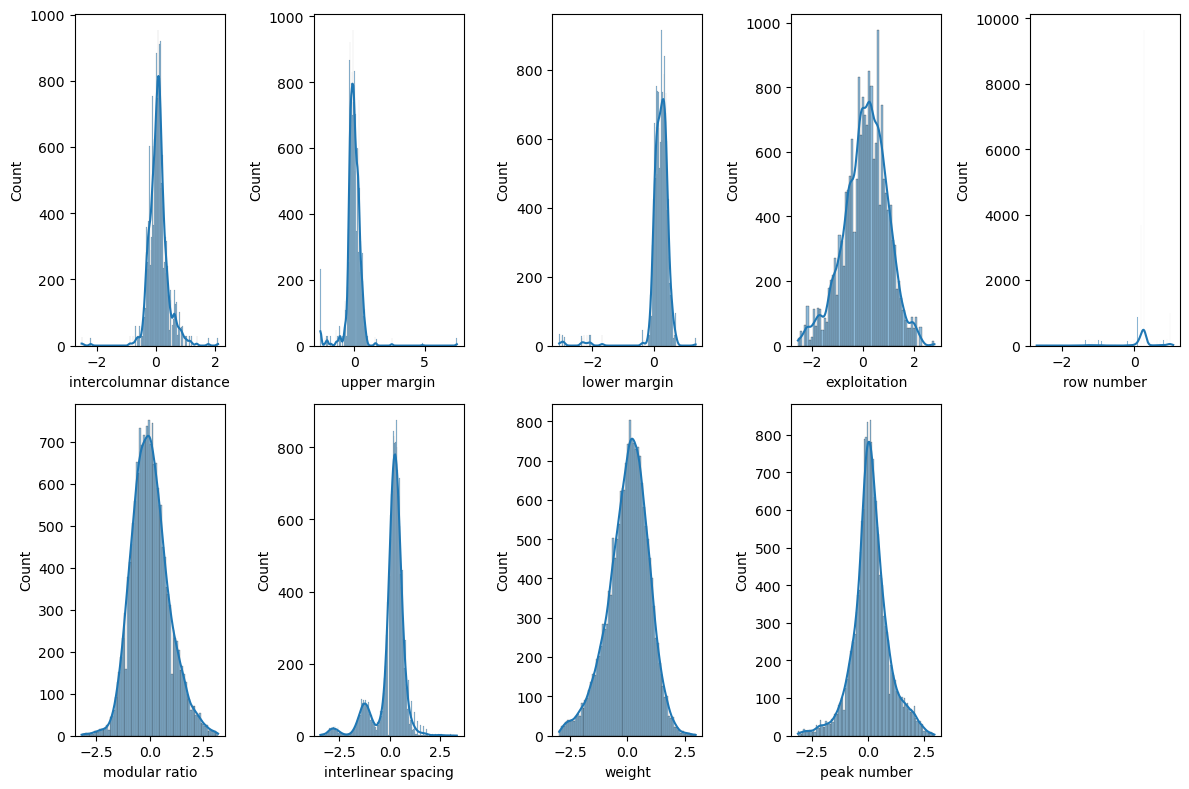

In [15]:
# plot histograms with normal curve for all numerical columns
numerical_columns = avila.select_dtypes(include='number').columns

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 5, i+1)
    sns.histplot(data=avila, x=col, kde=True)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

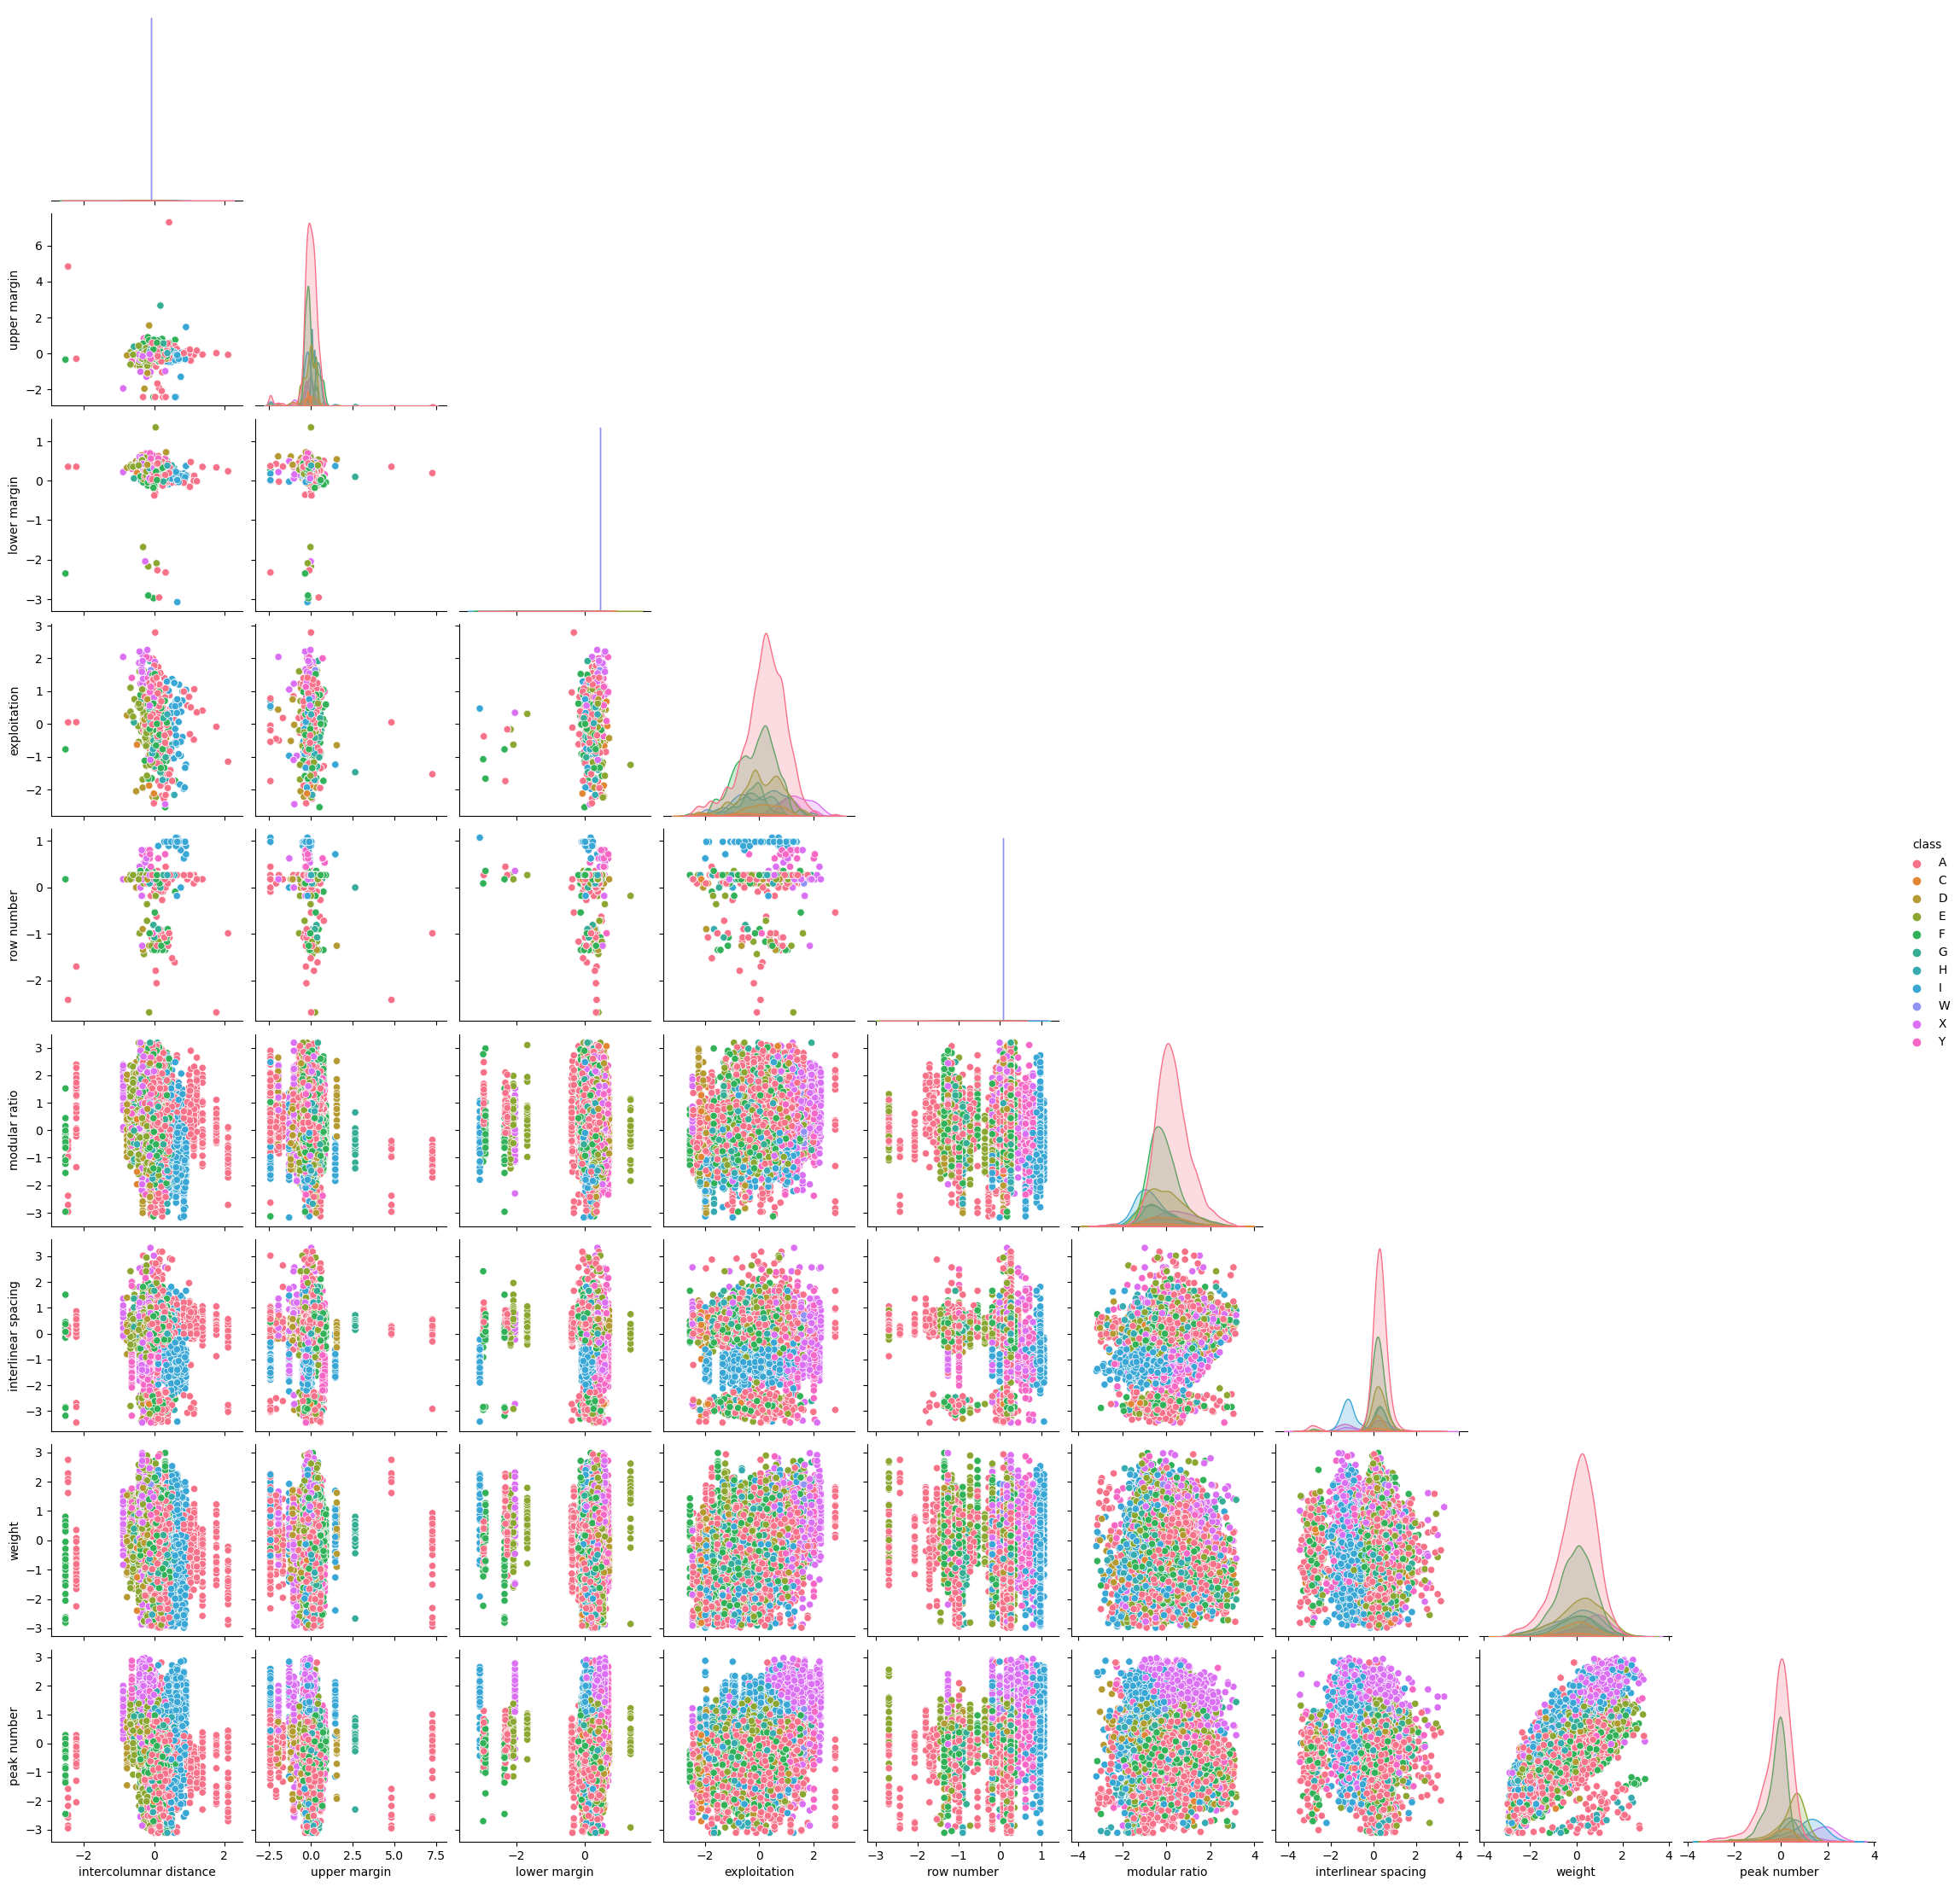

In [16]:
# plot pairplots
sns.pairplot(avila, hue='class', diag_kind='kde', corner=True)

In [17]:
X = np.array(avila.drop('class',axis=1))
y = np.array(avila['class'])

## Decision Tree

In [18]:
%%time
# hyperparameter tuning using GridSearchCV

tree_ = DecisionTreeClassifier()
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 7, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 5, 7, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced'],
    'random_state': [42]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(tree_, hyperparameters, cv=5)
grid_search.fit(X, y)
best_model_tree = grid_search.best_estimator_

CPU times: user 1min 46s, sys: 277 ms, total: 1min 46s
Wall time: 1min 46s


In [19]:
# best estimator
best_model_tree

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features='sqrt', min_samples_split=5,
                       random_state=42)

In [20]:
# StratifiedKFold 

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
fold = 1 
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    best_model_tree.fit(X_train_fold, y_train_fold)
    y_pred = best_model_tree.predict(X_test_fold)
    print('Fold',str(fold),'Accuracy:',accuracy_score(y_test_fold,y_pred))
    lst_accu_stratified.append(best_model_tree.score(X_test_fold, y_test_fold))
    fold +=1

Fold 1 Accuracy: 0.9201101928374655
Fold 2 Accuracy: 0.9052341597796143
Fold 3 Accuracy: 0.9355371900826446
Fold 4 Accuracy: 0.9333333333333333
Fold 5 Accuracy: 0.9349862258953168
Fold 6 Accuracy: 0.953168044077135
Fold 7 Accuracy: 0.8997245179063361
Fold 8 Accuracy: 0.9239250275633958
Fold 9 Accuracy: 0.9195148842337376
Fold 10 Accuracy: 0.9437706725468578


In [21]:
print('Maximum Accuracy That can be obtained from this model(decision tree) is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Maximum Accuracy That can be obtained from this model(decision tree) is: 95.31680440771349 %

Minimum Accuracy: 89.97245179063361 %

Overall Accuracy: 92.69304248255837 %

Standard Deviation is: 0.01657777525388694


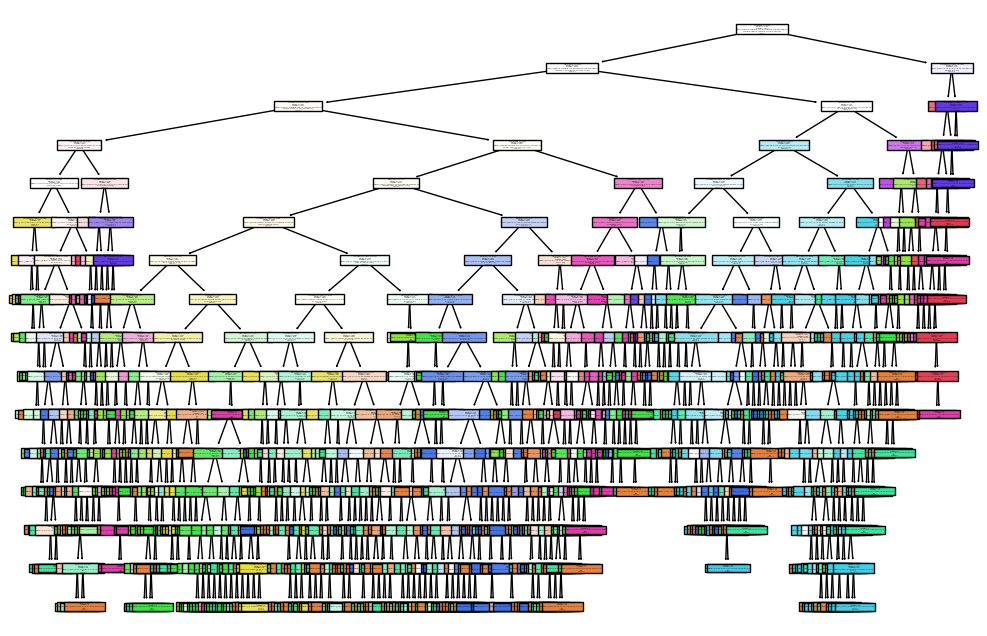

In [22]:
plt.figure(figsize=(12, 8))
tree.plot_tree(best_model_tree, filled=True, feature_names=list(avila.drop('class',axis=1).columns), class_names=list(avila['class'].value_counts().to_dict().keys()))
plt.savefig('decision_tree.png')
plt.show()

## k nearest neighbours

In [23]:
%%time

# hyperparameter tuning using GridSearchCV
hyperparameters = {
    'n_neighbors': [3, 5, 7, 9 ,11 ,13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')
grid_search.fit(X, y)
best_model_knn = grid_search.best_estimator_

CPU times: user 20.5 s, sys: 45.6 ms, total: 20.6 s
Wall time: 20.6 s


In [24]:
# best estimator KNN
best_model_knn

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [25]:
# StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
fold = 1 
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    best_model_knn.fit(X_train_fold, y_train_fold)
    y_pred = best_model_knn.predict(X_test_fold)
    print('Fold',str(fold),'Accuracy:',accuracy_score(y_test_fold,y_pred))
    lst_accu_stratified.append(best_model_knn.score(X_test_fold, y_test_fold))
    fold +=1

Fold 1 Accuracy: 0.8958677685950414
Fold 2 Accuracy: 0.9035812672176309
Fold 3 Accuracy: 0.9129476584022038
Fold 4 Accuracy: 0.8842975206611571
Fold 5 Accuracy: 0.9013774104683195
Fold 6 Accuracy: 0.9057851239669421
Fold 7 Accuracy: 0.8964187327823692
Fold 8 Accuracy: 0.9162072767364939
Fold 9 Accuracy: 0.9140022050716649
Fold 10 Accuracy: 0.9090407938257994


In [26]:
print('Maximum Accuracy That can be obtained from this model (KNN) is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Maximum Accuracy That can be obtained from this model (KNN) is: 91.6207276736494 %

Minimum Accuracy: 88.42975206611571 %

Overall Accuracy: 90.39525757727623 %

Standard Deviation is: 0.009868839215986585


In [27]:
%%time
# hyperparameter tuning for kmeans algorthim

param_grid = {
    'n_clusters': [11],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30, 40, 50],
    'max_iter': [100, 200, 300, 500, 800]
}

kmeans = KMeans()
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X)
best_model_kmeans = grid_search.best_estimator_

CPU times: user 41min 31s, sys: 19min 15s, total: 1h 46s
Wall time: 8min 34s


In [28]:
# best estimator
best_model_kmeans

KMeans(max_iter=800, n_clusters=11, n_init=40)

In [29]:
# prediction
pred_kmeans = best_model_kmeans.predict(X)

In [30]:
# assigning the codes for the class variable
cat_columns = avila.select_dtypes(['category']).columns
avila[cat_columns] = avila[cat_columns].apply(lambda x: x.cat.codes)

In [31]:
# computing the Completeness Score and Homogeneity Score

completeness_score_unscaled = completeness_score(avila['class'],pred_kmeans)
homogeneity_score_unscaled = homogeneity_score(avila['class'],pred_kmeans)
print ('Completeness Score:',completeness_score_unscaled)
print ('Homogeneity Score:',homogeneity_score_unscaled)

Completeness Score: 0.17217765223588402
Homogeneity Score: 0.19747880814144242


In [32]:
# scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [33]:
#prediction
pred_kmeans_scaled = best_model_kmeans.predict(scaled_data)

In [34]:
# computing the Completeness Score and Homogeneity Score after scaling
completeness_score_scaled = completeness_score(avila['class'],pred_kmeans_scaled)
homogeneity_score_scaled = homogeneity_score(avila['class'],pred_kmeans_scaled)
print ('Completeness Score:',completeness_score_scaled)
print ('Homogeneity Score:',homogeneity_score_scaled)

Completeness Score: 0.18112489081865407
Homogeneity Score: 0.21385748720347125
